Analizar el genero de los pacientes

In [34]:
import pandas as pd

# Ruta del archivo Excel
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'

# Lee el archivo Excel en un DataFrame
df = pd.read_excel(file_path)

# Ensure the 'Gender' column exists
if 'Gender' in df.columns:
    # Count the number of patients of each gender
    gender_counts = df['Gender'].value_counts()
    
    # Display the results
    print("\nNumber of patients by gender:")
    print(gender_counts)
else:
    print("The 'Gender' column does not exist in the DataFrame.")


Number of patients by gender:
Gender
hombre    453
mujer     182
Name: count, dtype: int64


In [36]:
import pandas as pd

# Path to the Excel file
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Ensure the 'Gender' and 'AHI' columns exist
if 'Gender' in df.columns and 'AHI' in df.columns:
    # Filter patients based on AHI value
    ahi_greater_30 = df[df['AHI'] > 30]
    ahi_between_15_30 = df[(df['AHI'] <= 30) & (df['AHI'] >= 15)]
    ahi_less_15 = df[df['AHI'] < 15]

    # Count the number of patients of each gender in each AHI category
    count_ahi_greater_30 = ahi_greater_30['Gender'].value_counts()
    count_ahi_between_15_30 = ahi_between_15_30['Gender'].value_counts()
    count_ahi_less_15 = ahi_less_15['Gender'].value_counts()

    # Display the results
    print("\nNumber of patients with AHI > 30 by gender:")
    print(count_ahi_greater_30)

    print("\nNumber of patients with AHI between 15 and 30 by gender:")
    print(count_ahi_between_15_30)

    print("\nNumber of patients with AHI < 15 by gender:")
    print(count_ahi_less_15)
else:
    print("The 'Gender' and/or 'AHI' columns do not exist in the DataFrame.")


Number of patients with AHI > 30 by gender:
Gender
hombre    125
mujer      28
Name: count, dtype: int64

Number of patients with AHI between 15 and 30 by gender:
Gender
hombre    129
mujer      31
Name: count, dtype: int64

Number of patients with AHI < 15 by gender:
Gender
hombre    199
mujer     123
Name: count, dtype: int64


Histogramas sobre los datos

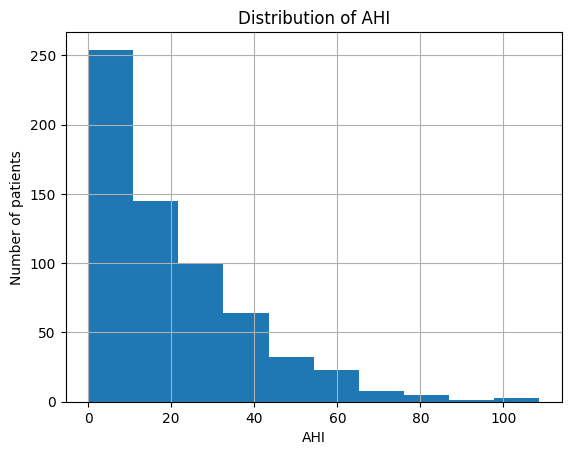

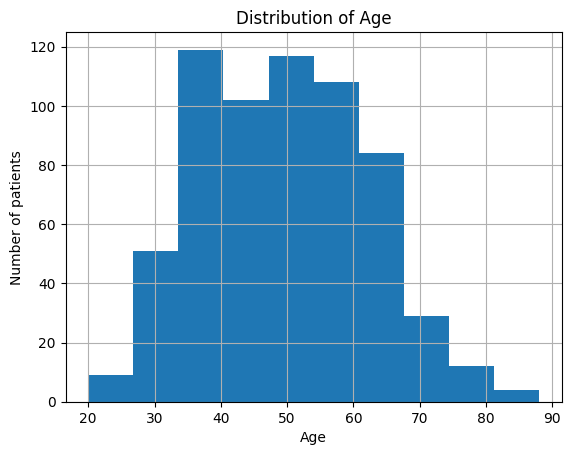

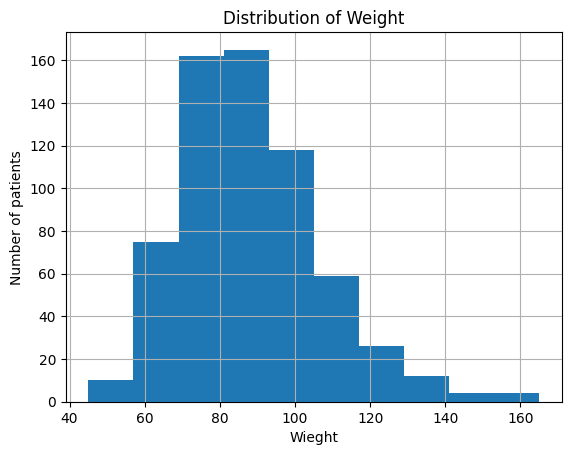

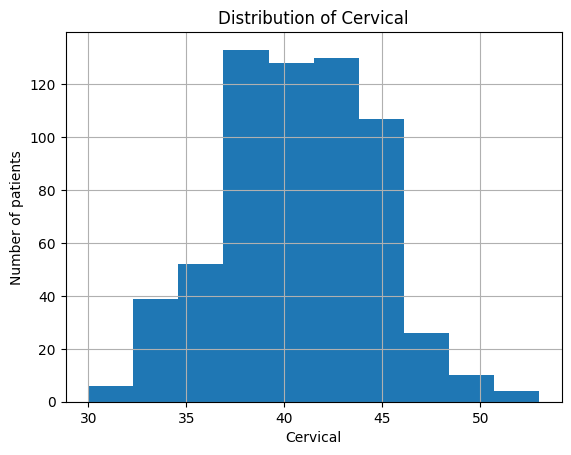

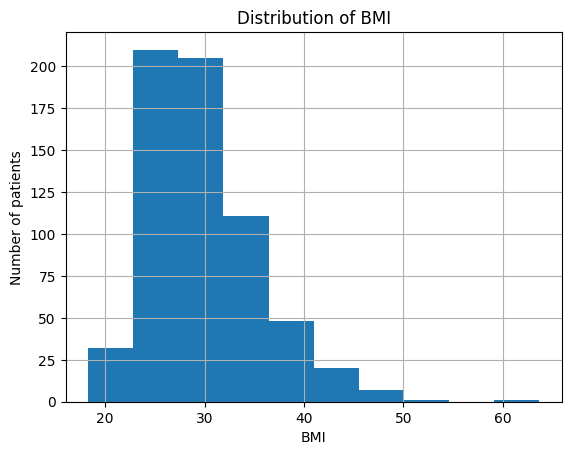

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Lee el archivo Excel en un DataFrame
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
df = pd.read_excel(file_path)

df['AHI'].hist()
plt.title('Distribution of AHI')
plt.xlabel('AHI')
plt.ylabel('Number of patients')
plt.show()
print("\n")

df['Age'].hist()
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.show()
print("\n")

df['Weight'].hist()
plt.title('Distribution of Weight')
plt.xlabel('Wieght')
plt.ylabel('Number of patients')
plt.show()
print("\n")

df['Cervical'].hist()
plt.title('Distribution of Cervical')
plt.xlabel('Cervical')
plt.ylabel('Number of patients')
plt.show()
print("\n")

df['BMI'].hist()
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Number of patients')
plt.show()

Relacion de dos Variables usando Histogramas

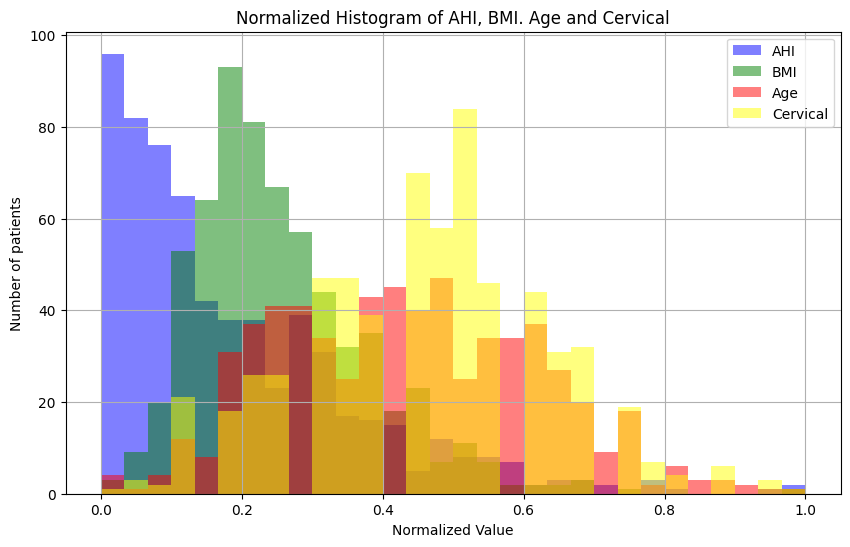

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Define la ruta del archivo
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'

# Lee el archivo Excel en un DataFrame
df = pd.read_excel(file_path)

# Asegúrate de que las columnas necesarias existen
required_columns = ['AHI', 'BMI', 'Age', 'Cervical']
if all(column in df.columns for column in required_columns):
    # Normalizar los valores de AHI, BMI, Age, Cervical
    scaler = MinMaxScaler()
    df[['AHI', 'BMI', 'Age', 'Cervical']] = scaler.fit_transform(df[['AHI', 'BMI', 'Age', 'Cervical']])
    
    # Crear histogramas combinados
    def create_histogram(x, y, z, a, x_label, y_label, z_label, a_label, title):
        plt.figure(figsize=(10, 6))
        plt.hist(x, bins=30, alpha=0.5, label=x_label, color='blue')
        plt.hist(y, bins=30, alpha=0.5, label=y_label, color='green')
        plt.hist(z, bins=30, alpha=0.5, label=z_label, color='red')
        plt.hist(a, bins=30, alpha=0.5, label=a_label, color='yellow')


        plt.title(title)
        plt.xlabel('Normalized Value')
        plt.ylabel('Number of patients')
        plt.legend(loc='upper right')
        plt.grid(True)
        plt.show()

    # Histograma para AHI y BMI
    create_histogram(df['AHI'].dropna(), df['BMI'].dropna(), df['Age'].dropna(), df['Cervical'].dropna(), 'AHI', 'BMI', 'Age', 'Cervical', 'Normalized Histogram of AHI, BMI. Age and Cervical')
else:
    print("Las columnas necesarias no existen en el DataFrame.")

Confusion matrix and relationship between all variables

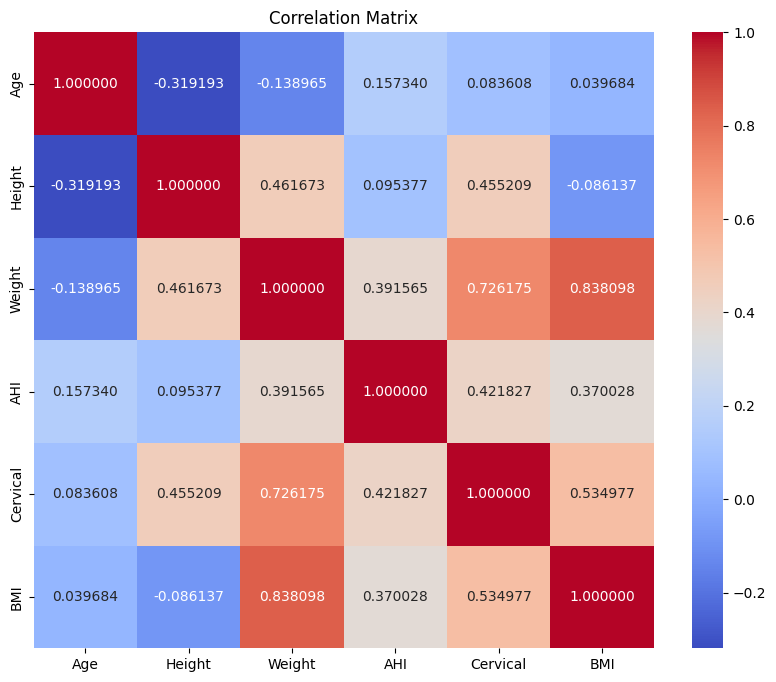

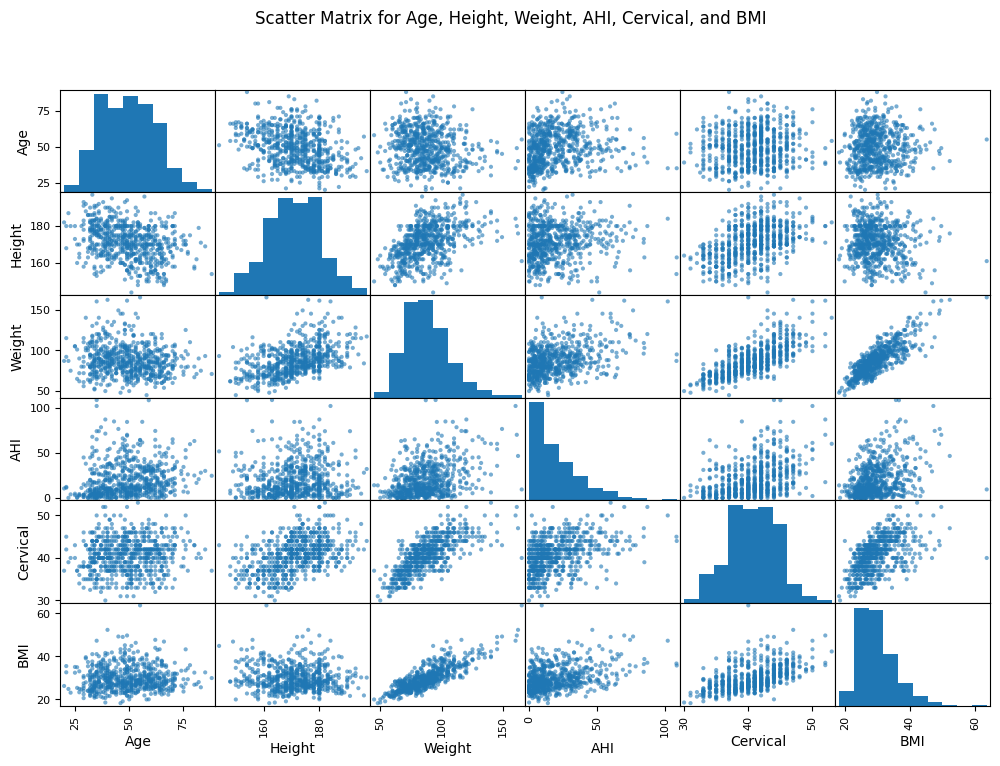

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Define la ruta del archivo
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'

# Lee el archivo Excel en un DataFrame
df = pd.read_excel(file_path)

# Selecciona las columnas de interés
df2 = df[['Age', 'Height', 'Weight', 'AHI', 'Cervical', 'BMI']]

# Crear la matriz de correlación
correlation_matrix = df2.corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.6f')
plt.title('Correlation Matrix')
plt.show()

# Crear gráficos de dispersión (scatter plots) para las variables seleccionadas
scatter_matrix(df2, alpha=0.6, figsize=(12, 8), diagonal='hist')
plt.suptitle('Scatter Matrix for Age, Height, Weight, AHI, Cervical, and BMI')
plt.show()

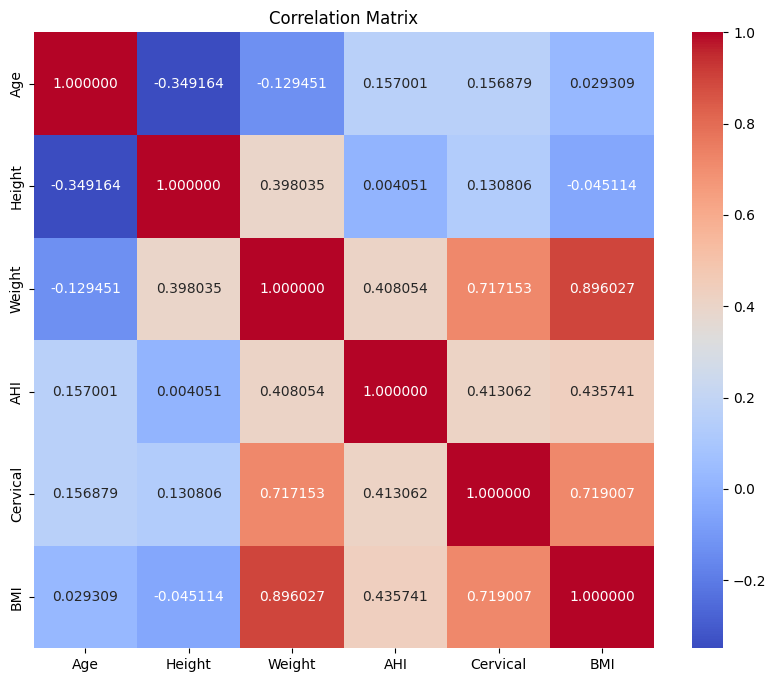

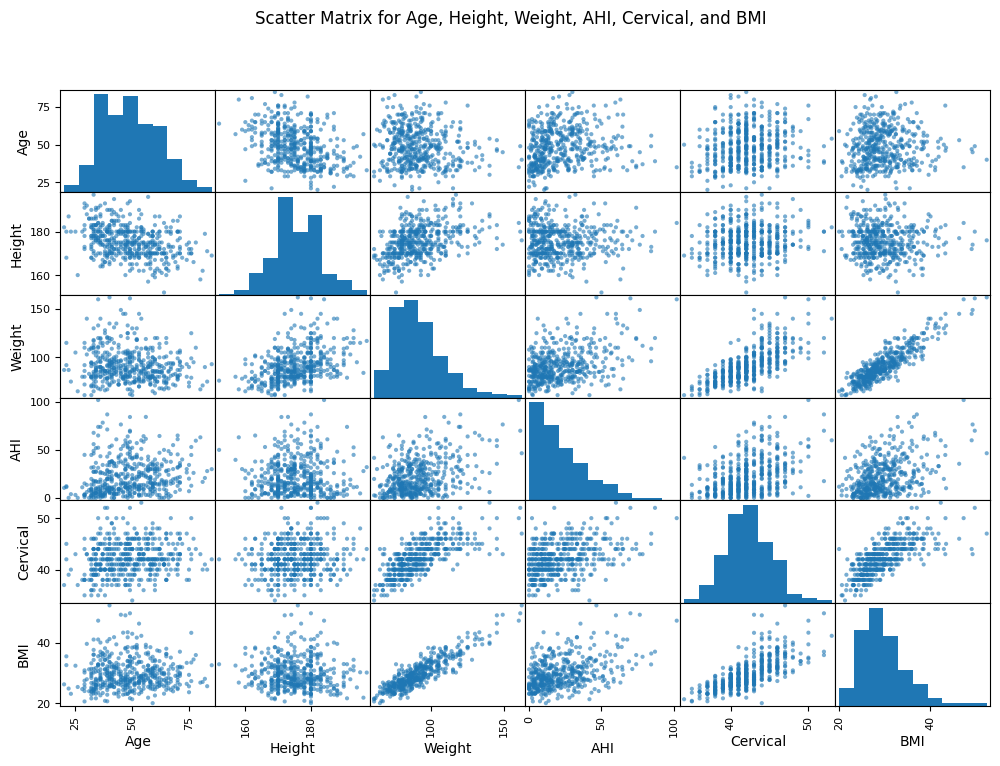

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Define la ruta del archivo
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI_Masculino.xlsx'

# Lee el archivo Excel en un DataFrame
df = pd.read_excel(file_path)

# Selecciona las columnas de interés
df2 = df[['Age', 'Height', 'Weight', 'AHI', 'Cervical', 'BMI']]

# Crear la matriz de correlación
correlation_matrix = df2.corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.6f')
plt.title('Correlation Matrix')
plt.show()

# Crear gráficos de dispersión (scatter plots) para las variables seleccionadas
scatter_matrix(df2, alpha=0.6, figsize=(12, 8), diagonal='hist')
plt.suptitle('Scatter Matrix for Age, Height, Weight, AHI, Cervical, and BMI')
plt.show()

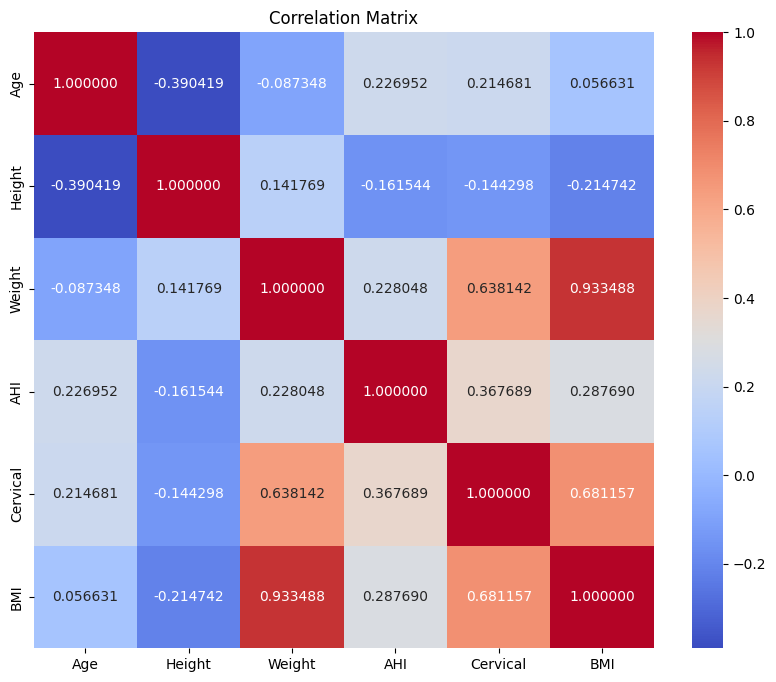

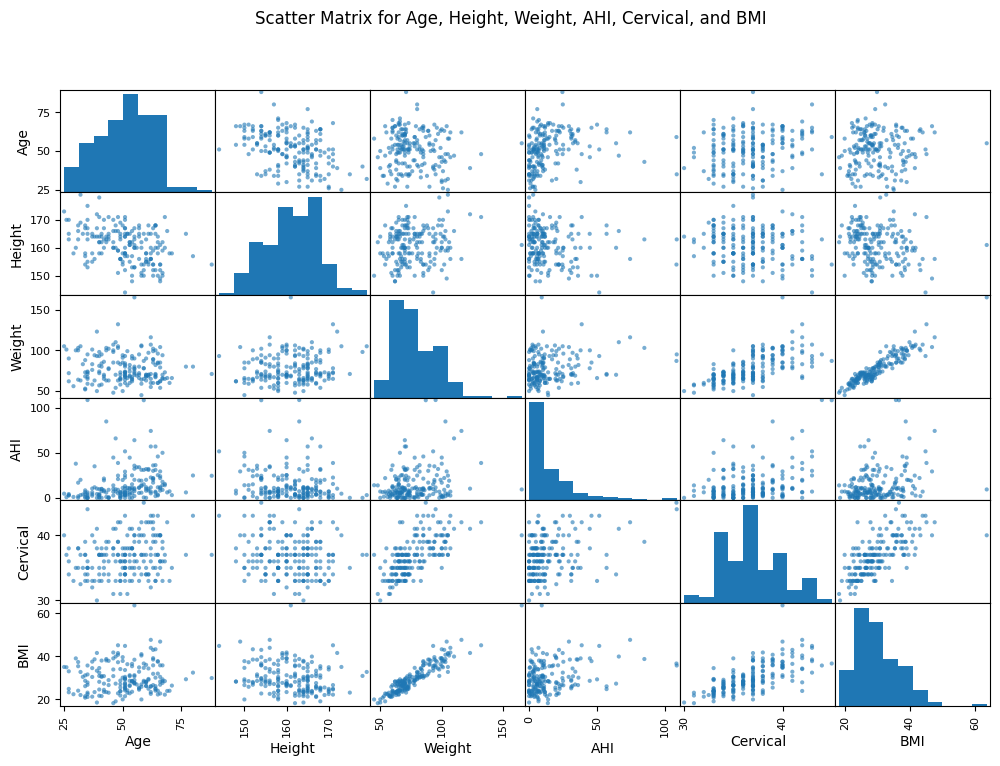

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Define la ruta del archivo
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI_Femenino.xlsx'

# Lee el archivo Excel en un DataFrame
df = pd.read_excel(file_path)

# Selecciona las columnas de interés
df2 = df[['Age', 'Height', 'Weight', 'AHI', 'Cervical', 'BMI']]

# Crear la matriz de correlación
correlation_matrix = df2.corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.6f')
plt.title('Correlation Matrix')
plt.show()

# Crear gráficos de dispersión (scatter plots) para las variables seleccionadas
scatter_matrix(df2, alpha=0.6, figsize=(12, 8), diagonal='hist')
plt.suptitle('Scatter Matrix for Age, Height, Weight, AHI, Cervical, and BMI')
plt.show()